In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import r2_score

#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [3]:
boston = load_boston()
data = boston.data

In [4]:
target = boston.target
features = boston.feature_names

In [5]:
X = pd.DataFrame(data, columns=features)
y = pd.DataFrame(target, columns=['price'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()

In [9]:
params_tsne = {
    'n_components':2,
    'learning_rate':250,
    'random_state':42
}

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

In [12]:
tsne = TSNE(**params_tsne)

In [14]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [15]:
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

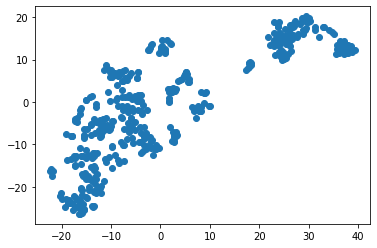

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [18]:
params_kmeans = {
    'n_clusters':3,
    'max_iter':100,
    'random_state':42
}

In [25]:
kmeans = KMeans(**params_kmeans)

In [26]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [27]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

In [28]:
labels_test = kmeans.predict(X_test_scaled)

In [33]:
params_tsne_kmeans = {
    'n_components':3,
    'learning_rate':250,
    'random_state':42
}

In [34]:
tsne_kmeans = TSNE(**params_tsne_kmeans)

In [35]:
X_train_tsne_kmeans = tsne_kmeans.fit_transform(X_train_scaled)

In [36]:
X_train_tsne_kmeans

array([[ -28.469015 ,    1.0532715, -142.64041  ],
       [  34.69978  ,   72.466995 ,  -25.204948 ],
       [ -39.43405  ,   23.902857 ,  -93.77232  ],
       ...,
       [ -99.49076  ,   12.243827 ,  -73.67808  ],
       [ -35.88964  , -108.21077  ,   89.86432  ],
       [  49.91483  ,   77.56903  ,  120.15824  ]], dtype=float32)

/home/anghei/.local/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


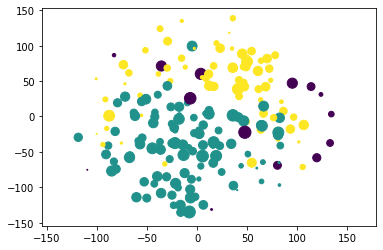

In [48]:
plt.scatter(X_train_tsne_kmeans[:, 0], X_train_tsne_kmeans[:, 1], X_train_tsne_kmeans[:, 2], c=labels_train);

In [54]:
y_train[labels_train==0].mean()[0]

27.78837209302326

In [55]:
print(f'Среднее значение показателя Price в кластере 0 - {round(y_train[labels_train==0].mean()[0], 3)}')
print(f'Среднее значение показателя Price в кластере 1 - {round(y_train[labels_train==1].mean()[0], 3)}')
print(f'Среднее значение показателя Price в кластере 2 - {round(y_train[labels_train==2].mean()[0], 3)}')
print('-'*10)

print(f'Среднее значение показателя CRIM в кластере 0 - {round(X_train.loc[labels_train==0, "CRIM"].mean(), 3)}')
print(f'Среднее значение показателя CRIM в кластере 1 - {round(X_train.loc[labels_train==1, "CRIM"].mean(), 3)}')
print(f'Среднее значение показателя CRIM в кластере 2 - {round(X_train.loc[labels_train==2, "CRIM"].mean(), 3)}')

Среднее значение показателя Price в кластере 0 - 27.788
Среднее значение показателя Price в кластере 1 - 16.165
Среднее значение показателя Price в кластере 2 - 24.958
----------
Среднее значение показателя CRIM в кластере 0 - 0.074
Среднее значение показателя CRIM в кластере 1 - 10.797
Среднее значение показателя CRIM в кластере 2 - 0.422
